# Tutorial - Test 

In [16]:
import gmsh
import sys
import numpy as np
from fidelio import *
import math

## Geometría en GMSH

In [19]:

filename="ellipse_two_circles.msh"
a=2.0          # semieje mayor elipse
b=1.2          # semieje menor elipse
r1=0.3         # radio círculo 1
r2=0.25        # radio círculo 2
c1=(-0.6, 0.0) # centro círculo 1
c2=(0.7, 0.2)  # centro círculo 2
lc=0.08        # tamaño característico


gmsh.initialize()
gmsh.model.add("ellipse_two_circles")

geo = gmsh.model.geo

# =====================================================
# 1) ELIPSE EXTERIOR
# =====================================================
pc = geo.addPoint(0, 0, 0, lc)

pR = geo.addPoint( a, 0, 0, lc)
pT = geo.addPoint(0,  b, 0, lc)
pL = geo.addPoint(-a, 0, 0, lc)
pB = geo.addPoint(0, -b, 0, lc)

# Ejes auxiliares
axis_major = geo.addPoint(a, 0, 0, lc)
axis_minor = geo.addPoint(0, b, 0, lc)

e1 = geo.addEllipseArc(pR, pc, axis_major, pT)
e2 = geo.addEllipseArc(pT, pc, axis_minor, pL)
e3 = geo.addEllipseArc(pL, pc, axis_major, pB)
e4 = geo.addEllipseArc(pB, pc, axis_minor, pR)

ellipse_loop = geo.addCurveLoop([e1, e2, e3, e4])

# =====================================================
# 2) CÍRCULO 1
# =====================================================
x1, y1 = c1
pc1 = geo.addPoint(x1, y1, 0, lc)

p1R = geo.addPoint(x1 + r1, y1, 0, lc)
p1T = geo.addPoint(x1, y1 + r1, 0, lc)
p1L = geo.addPoint(x1 - r1, y1, 0, lc)
p1B = geo.addPoint(x1, y1 - r1, 0, lc)

c1_1 = geo.addCircleArc(p1R, pc1, p1T)
c1_2 = geo.addCircleArc(p1T, pc1, p1L)
c1_3 = geo.addCircleArc(p1L, pc1, p1B)
c1_4 = geo.addCircleArc(p1B, pc1, p1R)

circle1_loop = geo.addCurveLoop([c1_1, c1_2, c1_3, c1_4])

# =====================================================
# 3) CÍRCULO 2
# =====================================================
x2, y2 = c2
pc2 = geo.addPoint(x2, y2, 0, lc)

p2R = geo.addPoint(x2 + r2, y2, 0, lc)
p2T = geo.addPoint(x2, y2 + r2, 0, lc)
p2L = geo.addPoint(x2 - r2, y2, 0, lc)
p2B = geo.addPoint(x2, y2 - r2, 0, lc)

c2_1 = geo.addCircleArc(p2R, pc2, p2T)
c2_2 = geo.addCircleArc(p2T, pc2, p2L)
c2_3 = geo.addCircleArc(p2L, pc2, p2B)
c2_4 = geo.addCircleArc(p2B, pc2, p2R)

circle2_loop = geo.addCurveLoop([c2_1, c2_2, c2_3, c2_4])

# =====================================================
# 4) SUPERFICIE PERFORADA
# =====================================================
surface = geo.addPlaneSurface(
    [ellipse_loop, circle1_loop, circle2_loop]
)

geo.synchronize()

# =====================================================
# 5) PHYSICAL GROUPS
# =====================================================
gmsh.model.addPhysicalGroup(1, [e1, e2, e3, e4],
                            name="ellipse_boundary")

gmsh.model.addPhysicalGroup(1,
                            [c1_1, c1_2, c1_3, c1_4],
                            name="circle_1_boundary")

gmsh.model.addPhysicalGroup(1,
                            [c2_1, c2_2, c2_3, c2_4],
                            name="circle_2_boundary")

gmsh.model.addPhysicalGroup(2, [surface],
                            name="domain")

# =====================================================
# 6) MALLADO TRIANGULAR
# =====================================================
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", lc)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", lc)

gmsh.model.mesh.generate(2)

gmsh.option.setNumber("Mesh.MshFileVersion", 2.2)
gmsh.write(filename)

gmsh.finalize()

## Mallado FVM

In [20]:
nodes, tris, boundary_nodes, boundary_edges = read_msh_extract_data("ellipse_two_circles.msh", gmsh)

mesh = MeshFVM(nodes, tris)  # si ya eliminaste Tessellation

boundary_faces = mesh.build_boundary_face_dict(boundary_edges)

In [26]:
boundary_faces

{'ellipse_boundary': array([  0,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,  41,
         44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,  80,
         83,  86,  89,  92,  95,   4,   5, 104, 107, 110, 113, 116, 119,
        122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155, 158,
        161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 100, 101,
        200, 203, 206, 209, 212, 215, 218, 221, 224, 227, 230, 234, 237,
        240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276,
        279, 282, 285, 288, 196, 197, 293, 296, 299, 302, 305, 308, 311,
        314, 317, 320, 323, 326, 329, 332, 335, 338, 341, 344, 347, 350,
        353, 356, 359, 363, 366, 369, 373, 376, 379, 382,   1]),
 'circle_1_boundary': array([387, 396, 399, 402, 406, 391, 392, 416, 419, 422, 425, 412, 413,
        435, 438, 442, 445, 431, 432, 451, 455, 458, 462, 388]),
 'circle_2_boundary': array([468, 477, 480, 483, 472, 473, 493, 496, 499, 488, 489, 509, 512,
     

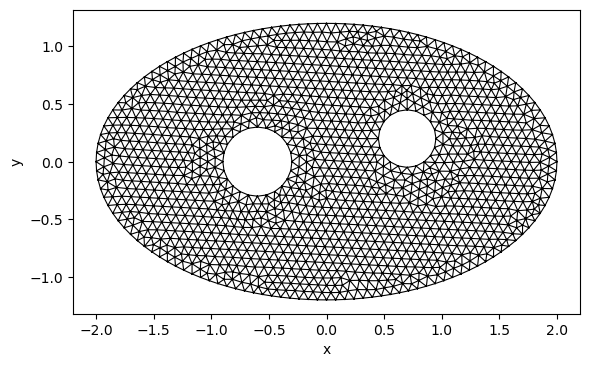

In [21]:
mesh.compute_fvm_geometry()
mesh.plot_topology(
    show_elements=False,
    show_faces=False,
    show_nodes=False,
    element_size = 1,
    face_size = 1,
    node_size = 1,
    figsize = (6, 6)
)

## Problema

In [22]:
p = FVMProblem(mesh)
p.initialize_phi(0.)
p._update_gradients()

In [23]:
def my_gamma(p):
    return np.full(p.Ne, 1.0)
p.gamma_function = my_gamma
p.initialize_gamma()

In [24]:
p.compute_diffusion_coefficients()

## Condiciones de borde

In [27]:
p.create_boundary_patches(boundary_faces)

In [28]:
def my_boundary_sources(p):
    Sc = np.zeros(p.Ne)
    Sp = np.zeros(p.Ne)

    patch = p.ellipse_boundary
    gamma = p.Gamma_f[patch.faces]
    coeff = gamma * patch.Sf_norm / patch.dCf_norm
    Sp[patch.cells] += coeff
    Sc[patch.cells] += coeff * 0.5

    patch = p.circle_1_boundary
    gamma = p.Gamma_f[patch.faces]
    coeff = gamma * patch.Sf_norm / patch.dCf_norm
    Sp[patch.cells] += coeff
    Sc[patch.cells] += coeff * 1

    patch = p.circle_2_boundary
    gamma = p.Gamma_f[patch.faces]
    coeff = gamma * patch.Sf_norm / patch.dCf_norm
    Sp[patch.cells] += coeff
    Sc[patch.cells] += coeff * 0
    return Sc, Sp

In [29]:
p.boundary_sources_function = my_boundary_sources
p.calculate_boundary_sources()

## Ensamblaje y solución

In [30]:
p.assemble_system()

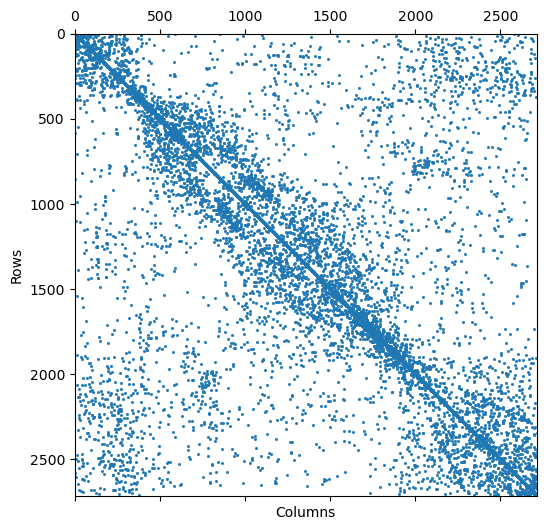

In [31]:
p.plot_matrix_sparsity()

In [32]:
p.solve()

problem solved...


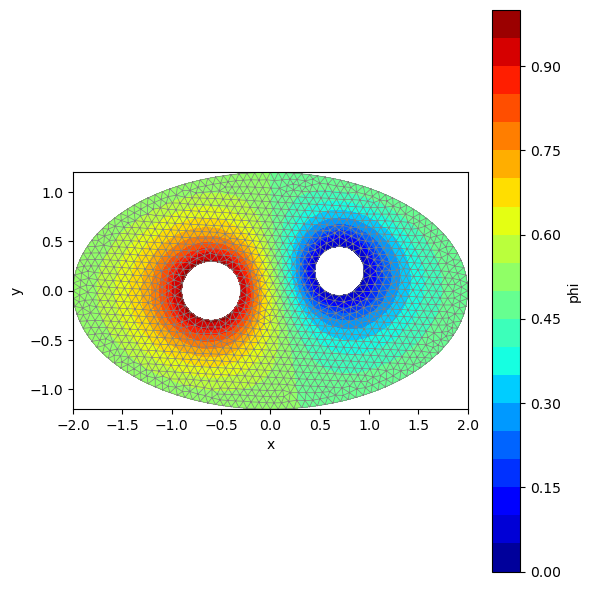

In [34]:
plot_phi_triangulation(p, 
                       show_contour_lines = False,
                      figsize=(6, 6),
                      cmap = "jet",
                      show_mesh=True)